# MA930 Assignment 1
*Student ID: 2260253*

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math as m

# built-in statistics function for unbiased variance
from statistics import variance

# statistical distributions
from scipy.stats import norm, chi2, uniform

#plotting
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 20})

**Question 1**

For any two events, $A, B \in \Omega$, $\mathbb{P}(A \cap B) = \mathbb{P}(A | B) \mathbb{P}(B)$. If we define $B' = B \cap C$,

\begin{align*}
    \mathbb{P}(A \cap B') &= \mathbb{P}(A | B') \mathbb{P}(B') \\
    \mathbb{P}(A \cap B \cap C) &= \mathbb{P}(A | B \cap C) \mathbb{P}(B \cap C) \\
    &= \mathbb{P}(A | B \cap C) \mathbb{P}(B | C) \mathbb{P}(C) .
\end{align*}

For $n$ events $A_1, A_2, ..., A_n$,

\begin{equation}\label{condprod}
    \mathbb{P}\Big{(}\cap_{i=1}^n A_i\Big{)} = \prod_{k=1}^n \mathbb{P}\Big{(}A_k | \cap_{j=1}^{k-1} A_j\Big{)} .
\end{equation}

We can prove this by induction. The base case for $n = 3$ was shown above to be true. For the induction step, assume the statement above is true and we want to show that it holds for $n \rightarrow n+1$:

\begin{align*}
    \mathbb{P}\Big{(}\cap_{i=1}^{n+1} A_i\Big{)} &= \mathbb{P}\Big{(}A_{n+1} \cap (\cap_{i=1}^n A_i)\Big{)} \\
    &= \mathbb{P}\Big{(}A_{n+1} | (\cap_{i=1}^n A_i)\Big{)} \mathbb{P}\Big{(}\cap_{i=1}^n A_i\Big{)} \\
    &= \mathbb{P}\Big{(}A_{n+1} | (\cap_{i=1}^n A_i)\Big{)} \prod_{k=1}^n \mathbb{P}\Big{(}A_k | \cap_{j=1}^{k-1} A_j\Big{)} \\
    &= \prod_{k=1}^{n+1} \mathbb{P}\Big{(}A_k | \cap_{j=1}^{k-1} A_j\Big{)} . \\
    &\, \square
\end{align*}

**Question 2**

The PGF of a discrete random variable $X$ is given by

\begin{align*}
    G(z) = \frac{z}{5}(2+3 z^2) &= \frac{2}{5} z + \frac{3}{5} z^3 \\
    &= \mathbb{P}(X = 0) + \mathbb{P}(X = 1) z + \mathbb{P}(X = 2) z^2 + \mathbb{P}(X = 3) z^3 + ...
\end{align*}

Comparing the two forms of $G(z)$ gives us the distribution of $X$:

\begin{equation*}
    \mathbb{P}(X = x) = 
    \begin{cases}
    \frac{2}{5} & x = 1 \\
    \frac{3}{5} & x = 3 \\
    0 & \textrm{otherwise}
    \end{cases} .
\end{equation*}

**Question 3**

**(i)** Let $(x_1, x_2, ..., x_n)$ be a collection of independent normally distributed random variables such that $x_j \sim \mathcal{N}(\mu_j, \sigma_j^2)$, with characteristic function $\phi_{x_j}(t) = \exp\Big{(} i t \mu_j - \frac{\sigma_j^2 t^2}{2} \Big{)}$. Let $X = \sum_{j=1}^n x_j$. Then

\begin{align*}
    \phi_X(t) = \phi_{\sum_j x_j}(t) &= \prod_{j=1}^n \phi_{x_j}(t) \\
    &= \prod_{j=1}^n \exp\Big{(} i t \mu_j - \frac{\sigma_j^2 t^2}{2} \Big{)} \\
    &= \exp\Big{(} \sum_{j=1}^n ( i t \mu_j - \frac{\sigma_j^2 t^2}{2}) \Big{)} \\
    &= \exp\Big{(} i t (\sum_{j=1}^n \mu_j) - \frac{t^2}{2} (\sum_{j=1}^n \sigma_j^2) \Big{)} .
\end{align*}

This is the characteristic function of a normally distributed random variable with mean $\sum_{j=1}^n \mu_j$ and variance $\sum_{j=1}^n \sigma_j^2$. Hence,

\begin{equation*}
    X \sim \mathcal{N}\Big{(}\mu = \sum_{j=1}^n \mu_j, \sigma^2 = \sum_{j=1}^n \sigma_j^2\Big{)} .
\end{equation*}

**(ii)** Let $(s_1, s_2, ..., s_n)$ be a collection of independent Gamma distributed random variables such that $s_j \sim \textrm{Gamma}(\alpha_j, \beta)$, with characteristic function $\phi_{s_j}(t) = (1 - \frac{i t}{\beta})^{-\alpha_j}$. Let $S = \sum_{j=1}^n s_j$. Then

\begin{align*}
    \phi_S(t) = \phi_{\sum_j s_j}(t) &= \prod_{j=1}^n \phi_{s_j}(t) \\
    &= \prod_{j=1}^n \Big{(} 1 - \frac{i t}{\beta} \Big{)}^{-\alpha_j} \\
    &= \Big{(} 1 - \frac{i t}{\beta} \Big{)}^{-\sum_j \alpha_j} .
\end{align*}

This is the characteristic function of a Gamma distributed random variable with shape parameter $\alpha = \sum_{j=1}^n \alpha_j$ and rate parameter $\beta$. Hence,

\begin{equation*}
    S \sim \textrm{Gamma}\Big{(}\alpha = \sum_{j=1}^n \alpha_j, \beta \Big{)} .
\end{equation*}

**Question 4**

**(i):** 

We consider the random variable $K$ to denote the number of successful neurotransmitters fired for $k = 0, 1, ..., n$. The distribution of the $k-th$ synaptic contact firing a nueurotransmitter is $\delta_k $, a bernoulli random number with probability $p$. $K$ is the sum of $n+1$ bernoulli random numbers, so

\begin{equation}
\mathbb{P}_2(K = k) = {n \choose k} p^k (1-p)^{n - k} .
\end{equation}

The next distribution to consider is $\mathbb{P}_1(V = v | K = k)$. If there are $k$ successful neurotransmitters fired, the total voltage increase (which I will denote by $V_k$) is $k \phi(a, \sigma^2) + \phi(0, s^2)$. Using the distribution properties of sums of normally distributed random variables,

\begin{align*}
V_k &\sim \mathcal{N}(k a + 0, k \sigma^2 + s^s) \\
&\sim \mathcal{N}(k a, k \sigma^2 + s^s) \\
\implies & \mathbb{P}_1(V = v | K = k) = \frac{1}{\sqrt{2 \pi (k \sigma^2 + s^2)}} \exp \Big{(} -\frac{(V - k a)^2}{2 (k \sigma^2 + s^2)} \Big{)} .
\end{align*}

Finally,
\begin{equation}
\mathbb{P}(V = v) = \sum_{k=0}^n {n \choose k} \frac{p^k (1-p)^{n - k}}{\sqrt{2 \pi (k \sigma^2 + s^2)}} \exp \Big{(} -\frac{(V - k a)^2}{2 (k \sigma^2 + s^2)} \Big{)} .
\end{equation}

In [2]:
# (ii)

def NeuronRV(p, n, a, sigma, s, NSim):
    # function to create the distribution of Voltage change across neurons
    # with inputs:
    # p: probability of a neuron firing
    # n: number of synaptic contacts from Neuron A to Neuron B
    # a: mean parameter for singular voltage change distributed normally
    # sigma: variance parameter for singular voltage change distributed normally
    # s: variance parameter for noise
    # NSim: number of simulations to run
    
    Vs = np.zeros(NSim)
    
    for i in range(NSim):
        Vsum = 0
        for k in range(n):
            r = np.random.rand()
            if r < p:
                # add to sum of voltage changes if bernoulli RV is a success
                Vsum += np.random.normal(loc = a, scale = sigma)
        Vs[i] = Vsum + np.random.normal(loc = 0, scale = s)
    
    return Vs

In [3]:
# Inputs
p = 0.3
n = 10
a = 0.2
sigma = 0.01
s = 0.05
NSim = 1000000

# simulating
Voltages = NeuronRV(p, n, a, sigma, s, NSim)

In [4]:
def NeuronTheoretical(v, n, p, sigma, a, s):
    # function to compute the theoretical distribution as described in 4(i)
    # taking same arguments as Neuron RV
    
    synapse = 0
    
    for k in range(0,n):
        mu = k*a
        sig = np.sqrt(k*sigma**2 + s**2)
        
        binom = m.comb(n,k)*p**k*(1-p)**(n-k)
        norm = 1/(sig*np.sqrt(2*np.pi))*np.exp(-0.5*((v - mu)/sig)**2)
        
        synapse += binom*norm
        
    return synapse

# distribution
vs = np.arange(-0.2,2.0,0.01)
theory = NeuronTheoretical(vs, n, p, sigma, a, s)

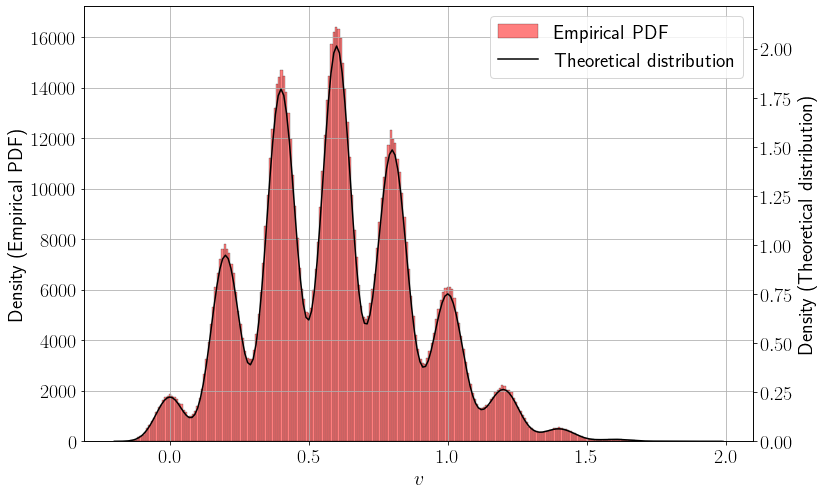

In [5]:
# plotting

fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(Voltages, color='r', alpha=0.5, label='Empirical PDF')
plt.xlabel('$v$')
plt.ylabel('Density (Empirical PDF)')
ax.grid()

ax2 = ax.twinx()
ax2.plot(vs, theory, 'k', label='Theoretical distribution')
ax2.set_ylim([0,theory.max()*1.1])
ax2.set_ylabel('Density (Theoretical distribution)')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

**Question 5**

For $x_1 + x_2 + ... + x_k = n$, rearrange to get

\begin{equation*}
    x_i = n - \sum_{j \neq i}^n x_j .
\end{equation*}

On the right-hand side we have two bins where we can place items representing the integer $1$. In the first bin we place $n$ items and in the second bin we place $k-1$ items. We have $n+k-1$ items in total. The number of ways to place items into bins is given by the multinomial coefficient

\begin{equation*}
    {n + k-1 \choose n, k-1} = {n + k-1 \choose k-1} .
\end{equation*}

**Question 6**

Draw 𝑛 = 30 normally distributed random numbers with mean 𝜇 = 5 and standard
deviation 𝜎 = 1, and calculate the sample mean and unbiased sample variance. Repeat this
1000 times, and plot density histograms of the sample means and unbiased sample
variances. Plot relevant theoretical distributions on top of these density histograms (and
explain where these theoretical distributions come from).

In [6]:
# inputs
n = 30
Nsim = 1000
mus = np.zeros(Nsim)
sigmas = np.zeros(Nsim)

# true mean and standard deviation
mean = 5
std = 1

for i in range(Nsim):
    # for Nsim times we generate n random numbers from our distribution
    # and compute the sample mean and unbiased sample variance
    
    sample = np.random.normal(loc=mean, scale=std, size=n)
    mus[i] = sample.mean()
    sigmas[i] = variance(sample)

The Central Limit Theorem states that, for $n$ sufficiently large,

\begin{equation*}
    \frac{\bar{X}_n - \mu}{\sigma/\sqrt{n}} \sim \mathcal{N}(0,1)
\end{equation*}

In other words, the sample mean $\bar{X}_n$ follows a normal distribution with mean $\mu$ and variance $(\sigma/\sqrt{n})^2 = \frac{\sigma^2}{n}$, typically for $n \geq 30$.

In [7]:
binwidth = 0.05

# round down our minimum sample mean to nearest binwidth
b1 = np.round((mus.min()-binwidth)/binwidth,0)*binwidth

# round up our minimum sample mean to nearest binwidth
b2 = np.round((mus.max()+binwidth)/binwidth,0)*binwidth

In [8]:
# theoretical distributions for sample mean
bins = np.arange(b1, b2, binwidth)
r = np.arange(b1, b2, 0.001)

norms = norm.pdf(r, mean, np.sqrt(std**2/n))

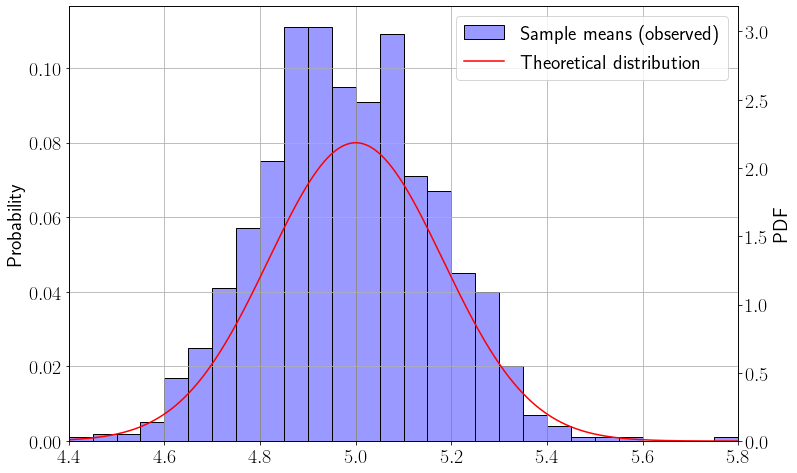

In [9]:
# density histogram of sample mean
fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(mus, color='b', alpha=0.4, bins=bins, stat='probability', label='Sample means (observed)')
ax.set_xlim([b1,b2])
ax.grid()

ax2 = ax.twinx()
ax2.plot(r, norms, 'r', label='Theoretical distribution')
ax2.set_ylim([0,norms.max()+1])
ax2.set_ylabel('PDF')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

Regarding the theoretical distribution of the unbiased sample variance $s_U^2$, an application of Cochran's theorem shows that

\begin{equation*}
    \frac{(n-1) s_U^2}{\sigma^2} \sim \chi^2_{n-1}
\end{equation*}

such that $\frac{(n-1) s_U^2}{\sigma^2}$ follows a Chi-squared distribution with $n-1$ degrees of freedom.

mean

$\sigma^2$

variance

$\frac{2 \sigma^4}{n-1}$

In [10]:
binwidth = 0.05

# round down our minimum sample variance to nearest binwidth
b1 = np.round((sigmas.min()-binwidth)/binwidth,0)*binwidth

# round up our minimum sample variance to nearest binwidth
b2 = np.round((sigmas.max()+binwidth)/binwidth,0)*binwidth

In [11]:
# theoretical distributions for sample mean
bins = np.arange(b1, b2, binwidth)
r = np.arange(b1, b2, 0.01)

# dividing by sigma^2/n-1 to obtain distribution for unbiased sample variance
chis = chi2.pdf(r/(std**2/(n-1)), n-1)

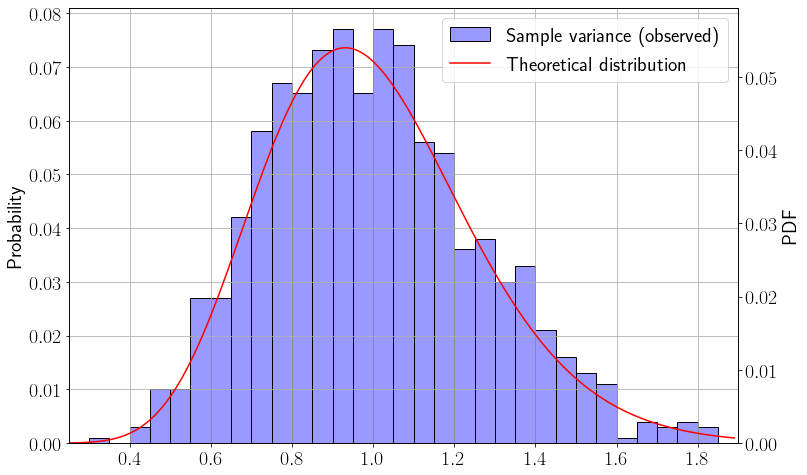

In [18]:
# density histogram of unbiased sample variance
fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(sigmas, color='b', alpha=0.4, bins=bins, stat='probability', label='Sample variance (observed)')
ax.set_xlim([b1,b2])
ax.grid()

ax2 = ax.twinx()
ax2.plot(r, chis, 'r', label='Theoretical distribution')
ax2.set_ylim([0,chis.max()*1.1])
ax2.set_ylabel('PDF')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

**Question 7**

In [13]:
# data
Mathsys = np.array([65, 73, 51, 67, 48, 80, 69, 83, 89, 62, 71, 67, 64, 78, 85, 49, 80, 60, 51, 70])
others = np.array([63, 72, 47, 63, 44, 78, 67, 52, 54, 58, 68, 65, 63, 77, 62, 46, 78, 56, 49, 65])

# sample sizes, means and unbiased variances
n_x = len(Mathsys)
n_y = len(others)
mu_x = Mathsys.mean()
mu_y = others.mean()
var_x = variance(Mathsys)
var_y = variance(others)

# null hypothesis and significance level
H0 = 'mu_x = mu_y (both courses are equally intelligent)'
alpha = 0.05
print('significance level = %.2f' % alpha)

# z-statistic
stat = (mu_x - mu_y)/np.sqrt(var_x/n_x + var_y/n_y)
print('z-statistic = %.3f' % stat)

# p-value
p = norm.sf(abs(stat))
print('p-value: %.4f' % p)
    
if p < alpha:
    print('We reject H0: ' + H0)

else:
    print('We fail to reject H0: ' + H0)

significance level = 0.05
z-statistic = 1.876
p-value: 0.0303
We reject H0: mu_x = mu_y (both courses are equally intelligent)


The p-value represents the probability of more extreme values than our given data occuring given the null hypothesis $H_0$ is true. If our p-value is less than the significance level (the probability of a Type I error), it means that more extreme data is unlikely to occur and we should reject $H_0$. In the case of the data above, the null hypothesis will be rejected for all significance levels greater than 0.0303.

Since our sample sizes $n_x$ and $n_y$ are rather small, the z-statistic does not resemble a true normal distribution, and it is not truly appropriate to use a two-sample z-test. Instead, we should consider a two-sample t-test. The statistic would be the same, however it follows a t distribution with $n_x + n_y - 2$ degrees of freedom, which would result in a different computation of the p-value.

**Question 8**

In [14]:
# (i)
# generating N=100 flips of a biased coin (probability of head = 0.7)
def biased_coin(N, p):
    seq = ''
    heads = 0
    
    for i in range(N):
        r = np.random.rand()
        if r < p:
            seq += 'H'
            heads += 1
        else:
            seq += 'T'

    return [seq, heads]

N = 100
p = 0.7

[seq, h] = biased_coin(N, p)
print(seq)
print(h)

HHTTHHHHHTHTHTTHHHHHHHHHHHTHTHHHHHHTHTHHHHHHHHHHHHTHTHHHHHHHTTTTHTHHHHHHHTTHTTTHHTHTTHTHHTHTHHTTHHHH
70


The likelihood function is

\begin{align*}
    \mathbb{P}(D | p) &= \prod_{k=1}^N \mathbb{P}(\textrm{flip k} | p) \\
    &= p^h (1 - p)^{(N - h)}
\end{align*}

where $h$ denotes the number of heads occuring.

In [15]:
# prior distribution functions and posterior as a function of
# likelihood and prior

def prior_dist1(p):
    return uniform.pdf(p, 0, 1)

def prior_dist2(p):
    return p*(1-p**4)


def posterior(h, N, p, prior):
        
    likelihood = p**h*(1-p)**(N-h)
    return likelihood*prior(ps)

In [16]:
ps = np.linspace(0,1,10001)

prior1 = prior_dist1(ps)
prior2 = prior_dist2(ps)
post1 = posterior(h, N, ps, prior_dist1)
post2 = posterior(h, N, ps, prior_dist2)

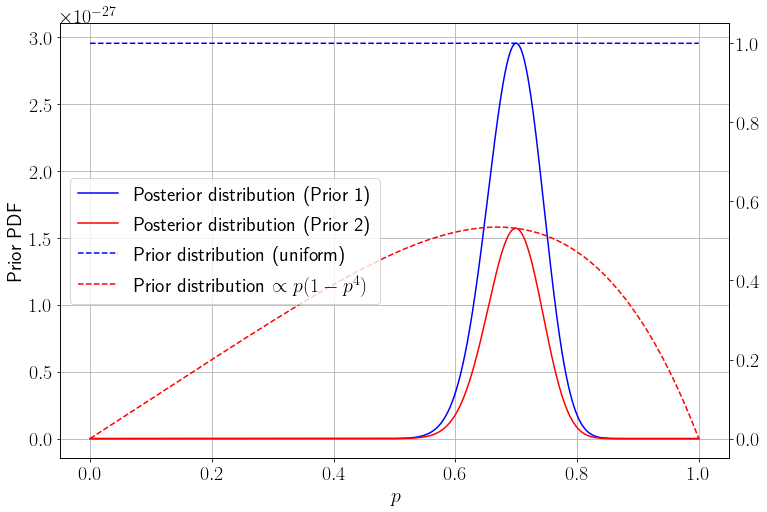

In [17]:
# plotting

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(ps,post1,'b',label='Posterior distribution (Prior 1)')
ax.plot(ps,post2,'r',label='Posterior distribution (Prior 2)')
#plt.legend(loc='best')
ax.set_xlabel('$p$')
ax.set_ylabel('Density')
ax.grid()

ax2 = ax.twinx()
ax2.plot(ps,prior1,'b--',label='Prior distribution (uniform)')
ax2.plot(ps,prior2,'r--',label='Prior distribution $\propto p(1-p^4)$')
ax.set_ylabel('Prior PDF')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center left')

**(ii):** The 90% highest density credible interval is the choice of interval $[a, b]$ containing 90% of the posterior distribution such that $b - a$ is as small as possible.

The highest density credible interval is easiest to compute for unimodal posterior distributions. Given a range for our model parameter $\alpha \in [\alpha_1, \alpha_2]$, we subdivide the range into $m$ strips of width $\Delta \alpha$, such that $\alpha_2 = \alpha_1 + m \Delta \alpha$.

We begin at the mode of the distribution $\alpha^\star$ and we numerically integrate the regions $[\alpha^\star - \Delta \alpha, \alpha^\star]$ and $[\alpha^\star, \alpha^\star + \Delta \alpha]$, adding the values of these integrations to a sum initially set to zero. We stop the algorithm when our sum reaches 0.9. This theoretically works for a unimodal distribution as the highest density of the posterior distribution will be centrered around the mode.

**Question 9**

For a single draw $x_1$, the likelihood of $x_1$ given parameter $\lambda$ is

\begin{equation*}
    \mathbb{P}(x_1 | \lambda) = \lambda e^{- \lambda x_1} .
\end{equation*}

For $n$ independent draws, the likelihood of the data $D = \{x_k\}_{k=1}^n$ given parameter $\lambda$ is

\begin{align*}
    \mathbb{P}(D | \lambda) &= \prod_{k=1}^n \lambda e^{- \lambda x_k} \\
    &= \lambda^n e^{- \lambda \sum_{k=1}^n x_k} \\
    &= \lambda^n e^{- \lambda n \bar{X}} ,
\end{align*}

where $\bar{X} = \frac{1}{n} \sum_{k=1}^n x_k$. The prior for parameter $\lambda$ is a Gamma distribution with shape parameter $\alpha$ and rate parameter $\beta$, so

\begin{equation*}
    \mathbb{P}(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{- \beta \lambda} .
\end{equation*}

The posterior is given by

\begin{align*}
    \mathbb{P}(\lambda | D) &\propto \mathbb{P}(D | \lambda) \mathbb{P}(\lambda) \\
    &\propto \lambda^n e^{- \lambda n \bar{X}} \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{- \beta \lambda} \\
    &\propto \lambda^{n + \alpha - 1} e^{- \lambda (n \bar{X} + \beta)} .
\end{align*}

Thus, we must have that the posterior is a gamma distribution,

\begin{equation*}
    \mathbb{P}(\lambda | D) \sim \textrm{Gamma}(\hat{\alpha} = n + \alpha, \hat{\beta} = n \bar{X} + \beta)
\end{equation*}

with shape parameter $\hat{\alpha}$ and rate parameter $\hat{\beta}$ specified above.